<a href="https://colab.research.google.com/github/run-llama/llama_index/blob/main/docs/docs/examples/llm/azure_openai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Azure OpenAI

If you're opening this Notebook on colab, you will probably need to install LlamaIndex 🦙.

In [ ]:
%pip install llama-index-llms-azure-openai

In [ ]:
!pip install llama-index

## Prerequisites

1. Setup an Azure subscription - you can create one for free [here](https://azure.microsoft.com/en-us/free/cognitive-services/)
2. Apply for access to Azure OpenAI Service [here](https://customervoice.microsoft.com/Pages/ResponsePage.aspx?id=v4j5cvGGr0GRqy180BHbR7en2Ais5pxKtso_Pz4b1_xUOFA5Qk1UWDRBMjg0WFhPMkIzTzhKQ1dWNyQlQCN0PWcu) 
3. Create a resource in the Azure portal [here](https://portal.azure.com/?microsoft_azure_marketplace_ItemHideKey=microsoft_openai_tip#create/Microsoft.CognitiveServicesOpenAI)
4. Deploy a model in Azure OpenAI Studio [here](https://oai.azure.com/)


You can find more details in [this guide.](https://learn.microsoft.com/en-us/azure/cognitive-services/openai/how-to/create-resource?pivots=web-portal)

Note down the **"model name"** and **"deployment name"**, you'll need it when connecting to your LLM.

## Environment Setup

### Find your setup information - API base, API key, deployment name (i.e. engine), etc

To find the setup information necessary, do the following setups:
1. Go to the Azure OpenAI Studio [here](https://oai.azure.com/)
2. Go to the chat or completions playground (depending on which LLM you are setting up)
3. Click "view code" (shown in image below)

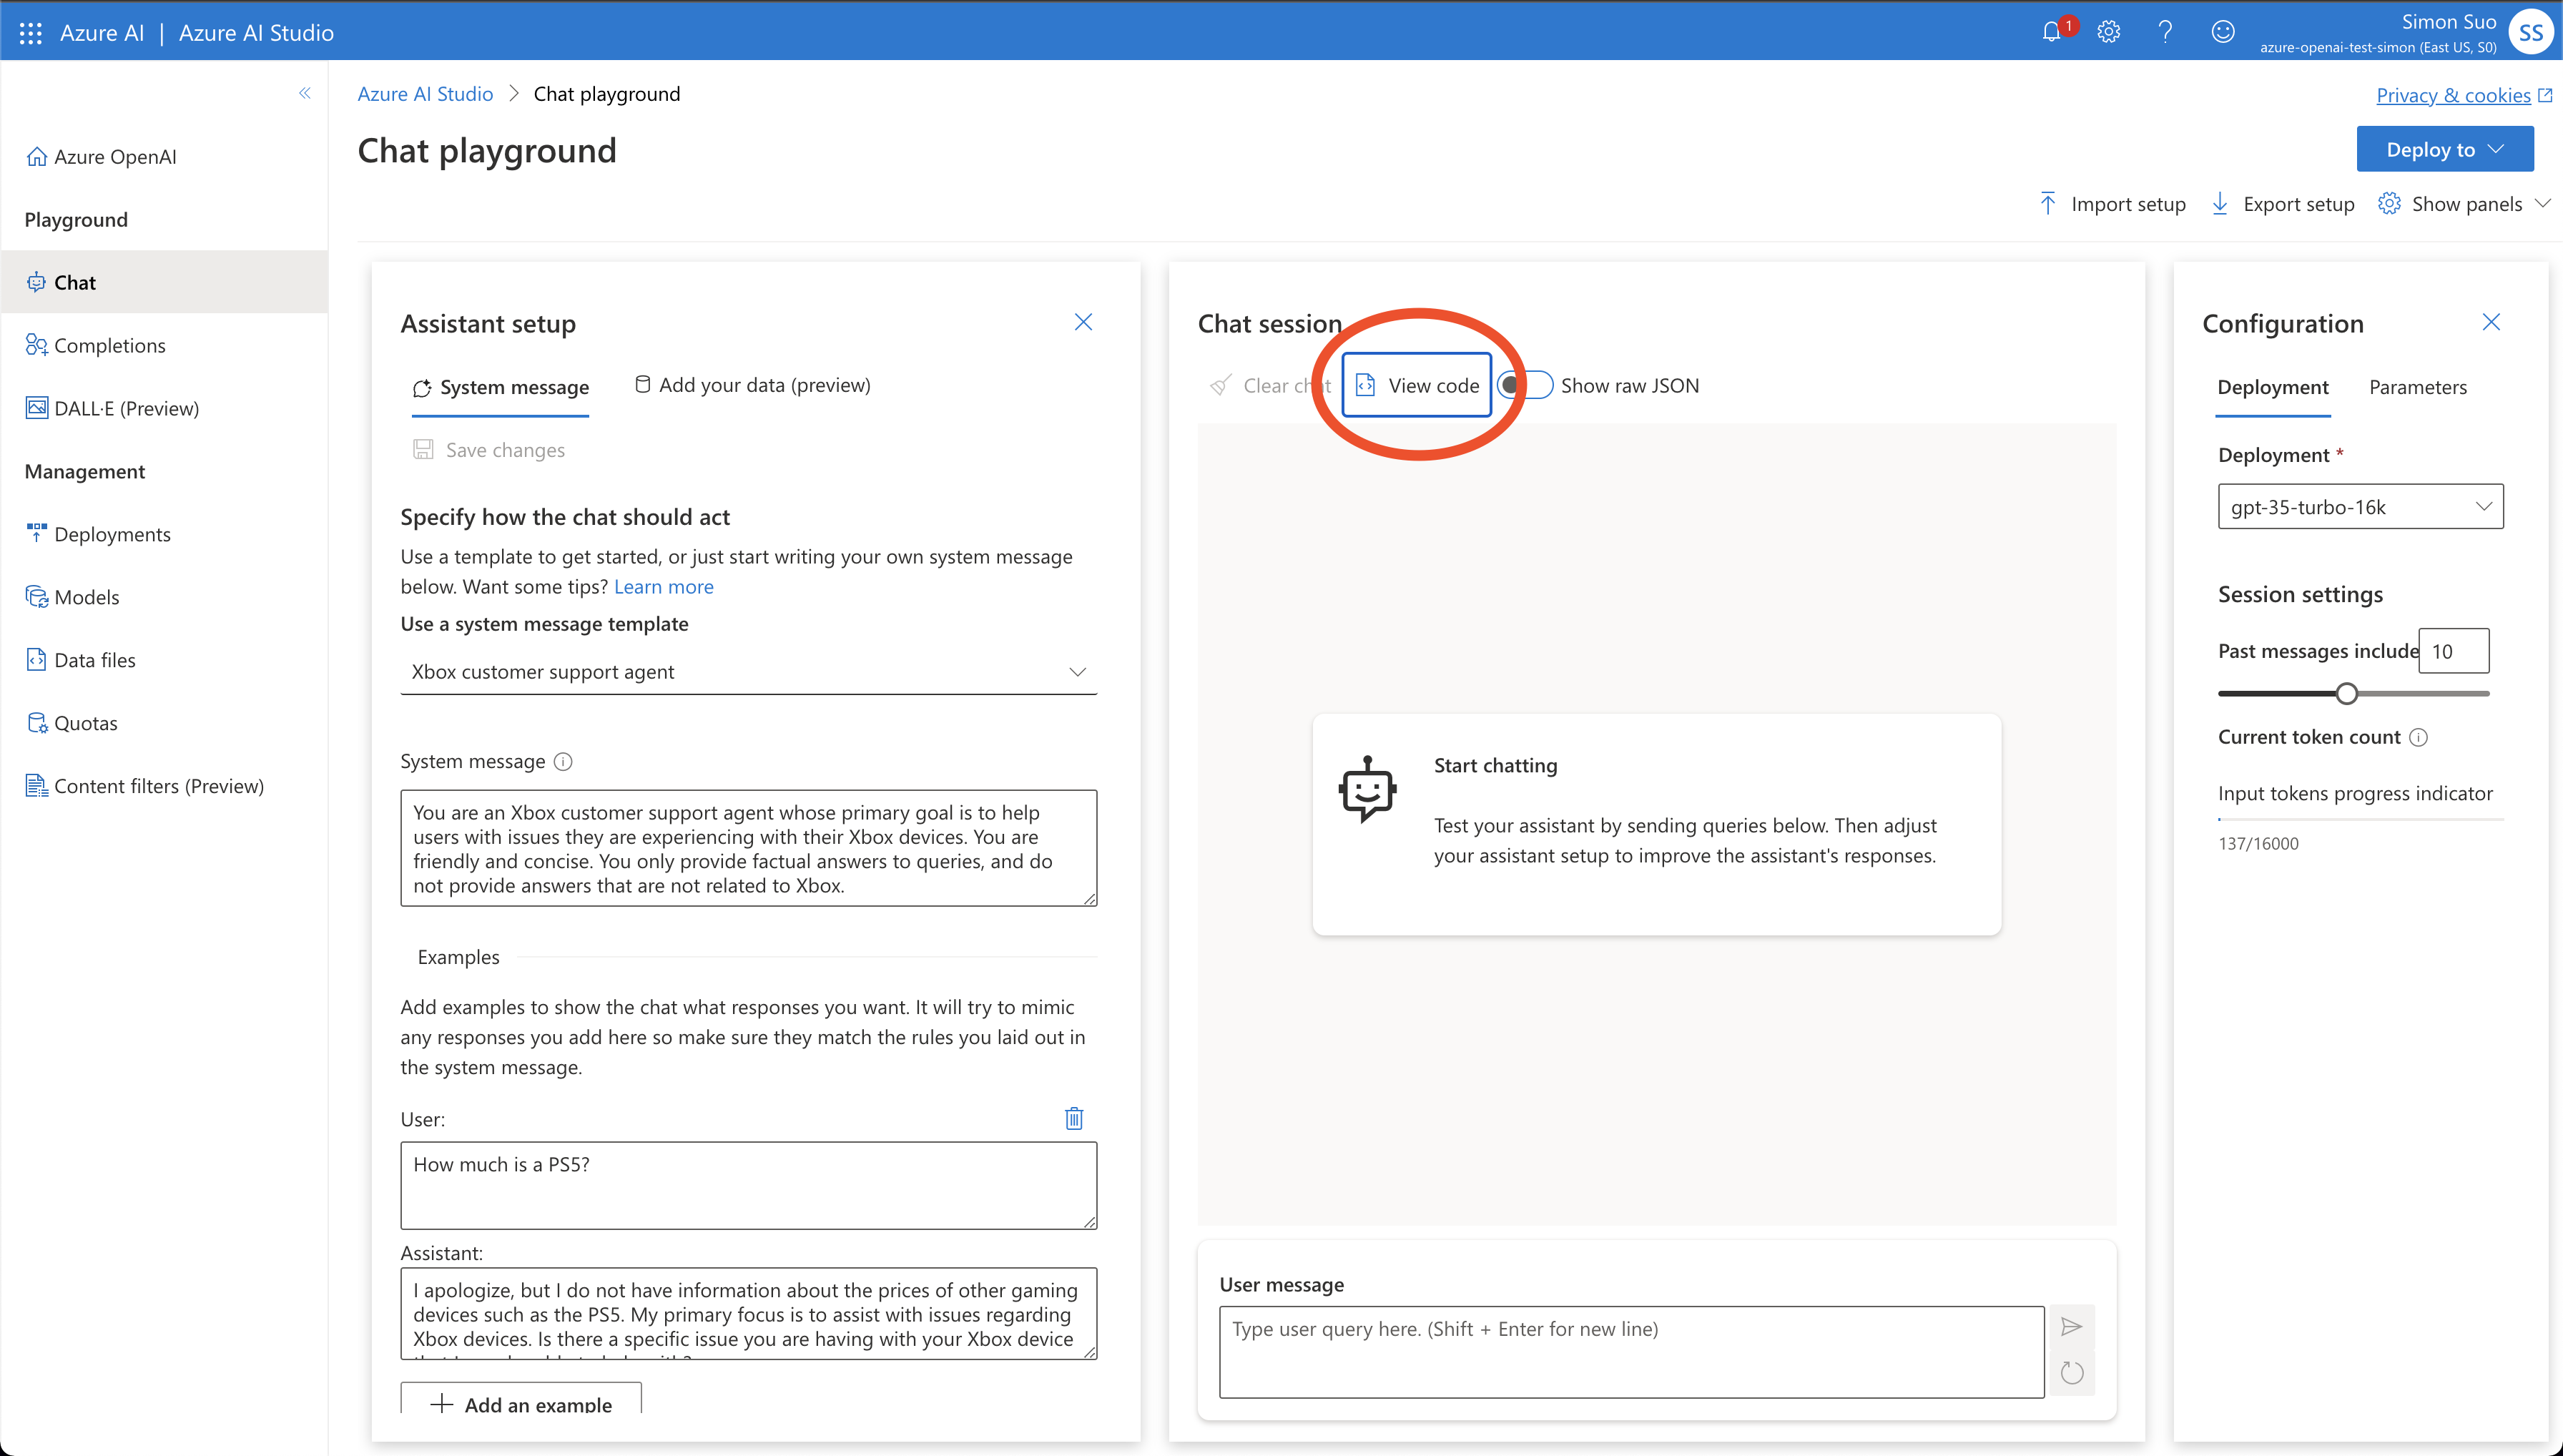

In [ ]:
from IPython.display import Image

Image(filename="./azure_playground.png")

4. Note down the `api_type`, `api_base`, `api_version`, `engine` (this should be the same as the "deployment name" from before), and the `key`

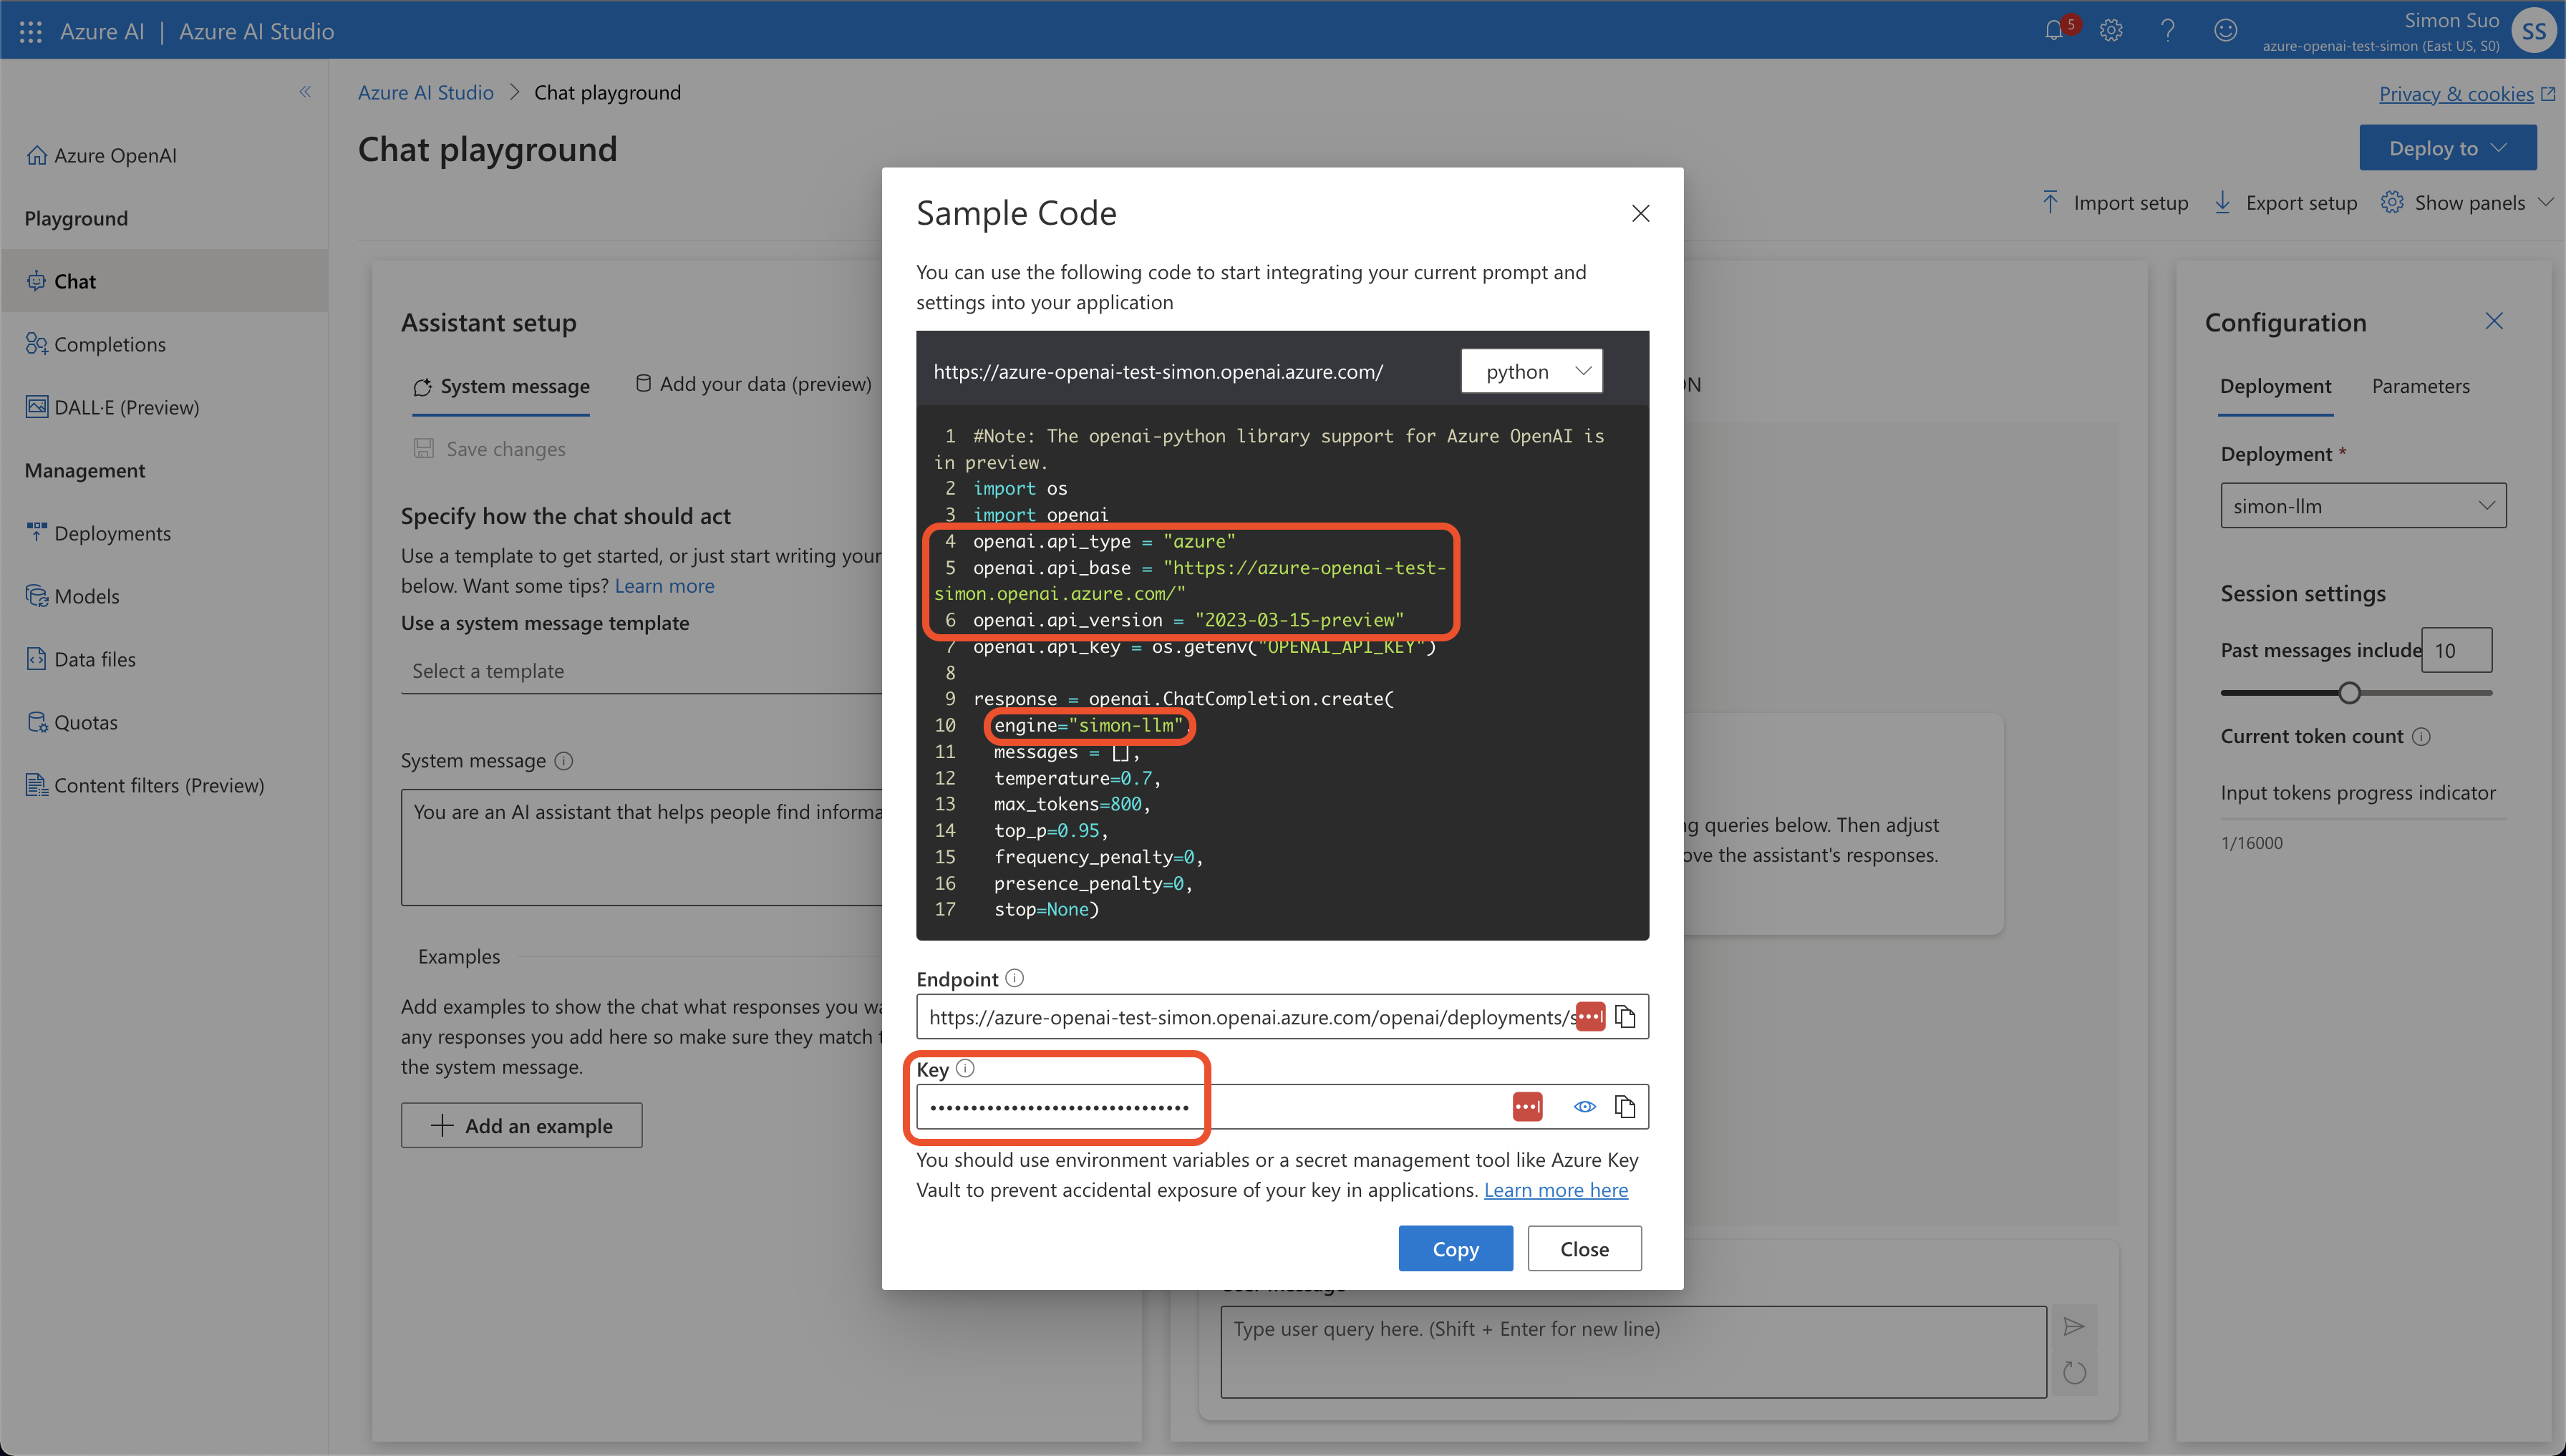

In [ ]:
from IPython.display import Image

Image(filename="./azure_env.png")

### Configure environment variables

Using Azure deployment of OpenAI models is very similar to normal OpenAI. 
You just need to configure a couple more environment variables.

- `OPENAI_API_VERSION`: set this to `2023-07-01-preview`
    This may change in the future.
- `AZURE_OPENAI_ENDPOINT`: your endpoint should look like the following
    https://YOUR_RESOURCE_NAME.openai.azure.com/
- `OPENAI_API_KEY`: your API key

In [ ]:
import os

os.environ["OPENAI_API_KEY"] = "<your-api-key>"
os.environ[
    "AZURE_OPENAI_ENDPOINT"
] = "https://<your-resource-name>.openai.azure.com/"
os.environ["OPENAI_API_VERSION"] = "2023-07-01-preview"

## Use your LLM

In [ ]:
from llama_index.llms.azure_openai import AzureOpenAI

Unlike normal `OpenAI`, you need to pass a `engine` argument in addition to `model`. The `engine` is the name of your model deployment you selected in Azure OpenAI Studio. See previous section on "find your setup information" for more details.

In [ ]:
llm = AzureOpenAI(
    engine="simon-llm", model="gpt-35-turbo-16k", temperature=0.0
)

Alternatively, you can also skip setting environment variables, and pass the parameters in directly via constructor.

In [ ]:
llm = AzureOpenAI(
    engine="my-custom-llm",
    model="gpt-35-turbo-16k",
    temperature=0.0,
    azure_endpoint="https://<your-resource-name>.openai.azure.com/",
    api_key="<your-api-key>",
    api_version="2023-07-01-preview",
)

Use the `complete` endpoint for text completion

In [ ]:
response = llm.complete("The sky is a beautiful blue and")
print(response)

the sun is shining brightly. Fluffy white clouds float lazily across the sky, creating a picturesque scene. The vibrant blue color of the sky brings a sense of calm and tranquility. It is a perfect day to be outside, enjoying the warmth of the sun and the gentle breeze. The sky seems to stretch endlessly, reminding us of the vastness and beauty of the world around us. It is a reminder to appreciate the simple pleasures in life and to take a moment to admire the natural wonders that surround us.


In [ ]:
response = llm.stream_complete("The sky is a beautiful blue and")
for r in response:
    print(r.delta, end="")

the sun is shining brightly. Fluffy white clouds float lazily across the sky, creating a picturesque scene. The vibrant blue color of the sky brings a sense of calm and tranquility. It is a perfect day to be outside, enjoying the warmth of the sun and the gentle breeze. The sky seems to stretch endlessly, reminding us of the vastness and beauty of the world around us. It is a reminder to appreciate the simple pleasures in life and to take a moment to pause and admire the natural wonders that surround us.

Use the `chat` endpoint for conversation

In [ ]:
from llama_index.core.llms import ChatMessage

messages = [
    ChatMessage(
        role="system", content="You are a pirate with colorful personality."
    ),
    ChatMessage(role="user", content="Hello"),
]

response = llm.chat(messages)
print(response)

assistant: Ahoy there, matey! How be ye on this fine day? I be Captain Jolly Roger, the most colorful pirate ye ever did lay eyes on! What brings ye to me ship?


In [ ]:
response = llm.stream_chat(messages)
for r in response:
    print(r.delta, end="")

Ahoy there, matey! How be ye on this fine day? I be Captain Jolly Roger, the most colorful pirate ye ever did lay eyes on! What brings ye to me ship?

Rather than adding same parameters to each chat or completion call, you can set them at a per-instance level with `additional_kwargs`.

In [ ]:
llm = AzureOpenAI(
    engine="simon-llm",
    model="gpt-35-turbo-16k",
    temperature=0.0,
    additional_kwargs={"user": "your_user_id"},
)